In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


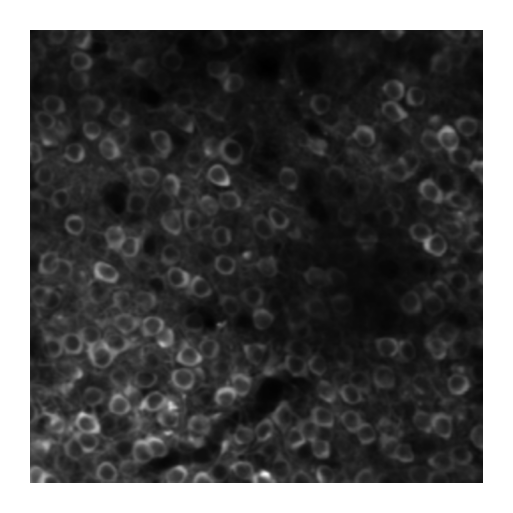

In [2]:
import numpy as np
import time, os, sys
from urllib.parse import urlparse
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline
mpl.rcParams['figure.dpi'] = 300
from cellpose import utils, io

# I will download images from website
urls = ['http://www.cellpose.org/static/images/img02.png',
        'http://www.cellpose.org/static/images/img03.png',
        'http://www.cellpose.org/static/images/img05.png']

data_path = "data/"
files = []
for url in urls:
    parts = urlparse(url)
    filename = os.path.join(data_path, os.path.basename(parts.path))
    if not os.path.exists(filename):
        sys.stderr.write('Downloading: "{}" to {}\n'.format(url, filename))
        utils.download_url_to_file(url, filename)
    files.append(filename)

# REPLACE FILES WITH YOUR IMAGE PATHS
# files = ['img0.tif', 'img1.tif']

# view 1 image
img = io.imread(files[-1])
plt.figure(figsize=(2,2))
plt.imshow(img)
plt.axis('off')
plt.show()

In [3]:
# RUN CELLPOSE

from cellpose import models, io

# DEFINE CELLPOSE MODEL
# model_type='cyto' or model_type='nuclei'
model = models.Cellpose(gpu=False, model_type='cyto')

# define CHANNELS to run segementation on
# grayscale=0, R=1, G=2, B=3
# channels = [cytoplasm, nucleus]
# if NUCLEUS channel does not exist, set the second channel to 0
# channels = [0,0]
# IF ALL YOUR IMAGES ARE THE SAME TYPE, you can give a list with 2 elements
# channels = [0,0] # IF YOU HAVE GRAYSCALE
# channels = [2,3] # IF YOU HAVE G=cytoplasm and B=nucleus
# channels = [2,1] # IF YOU HAVE G=cytoplasm and R=nucleus

# or if you have different types of channels in each image
channels = [[2,3], [0,0], [0,0]]

# if diameter is set to None, the size of the cells is estimated on a per image basis
# you can set the average cell `diameter` in pixels yourself (recommended) 
# diameter can be a list or a single number for all images

# you can run all in a list e.g.
# >>> imgs = [io.imread(filename) in files]
# >>> masks, flows, styles, diams = model.eval(imgs, diameter=None, channels=channels)
# >>> io.masks_flows_to_seg(imgs, masks, flows, diams, files, channels)
# >>> io.save_to_png(imgs, masks, flows, files)

# or in a loop
for chan, filename in zip(channels, files):
    img = io.imread(filename)
    masks, flows, styles, diams = model.eval(img, diameter=None, channels=chan)

    # save results so you can load in gui
    io.masks_flows_to_seg(img, masks, flows, diams, filename, chan)

    # save results as png
    io.save_to_png(img, masks, flows, filename)

>>>> using CPU
Running test snippet to check if MKL-DNN working
see https://pytorch.org/docs/stable/backends.html?highlight=mkl
** MKL version working - CPU version is sped up. **
processing 1 image(s)
computing styles from images
time spent: running network 1.87s; flow+mask computation 0.80
estimated cell diameters for 1 image(s) in 4.81 sec
>>> diameter(s) =  [29.38115358]
time spent: running network 7.52s; flow+mask computation 1.13
estimated masks for 1 image(s) in 8.67 sec
>>>> TOTAL TIME 13.48 sec
processing 1 image(s)
computing styles from images
time spent: running network 1.16s; flow+mask computation 0.50
estimated cell diameters for 1 image(s) in 3.27 sec
>>> diameter(s) =  [33.17679957]
time spent: running network 5.39s; flow+mask computation 0.68
estimated masks for 1 image(s) in 6.07 sec
>>>> TOTAL TIME 9.33 sec
processing 1 image(s)
computing styles from images
time spent: running network 4.80s; flow+mask computation 1.90
estimated cell diameters for 1 image(s) in 10.35 s

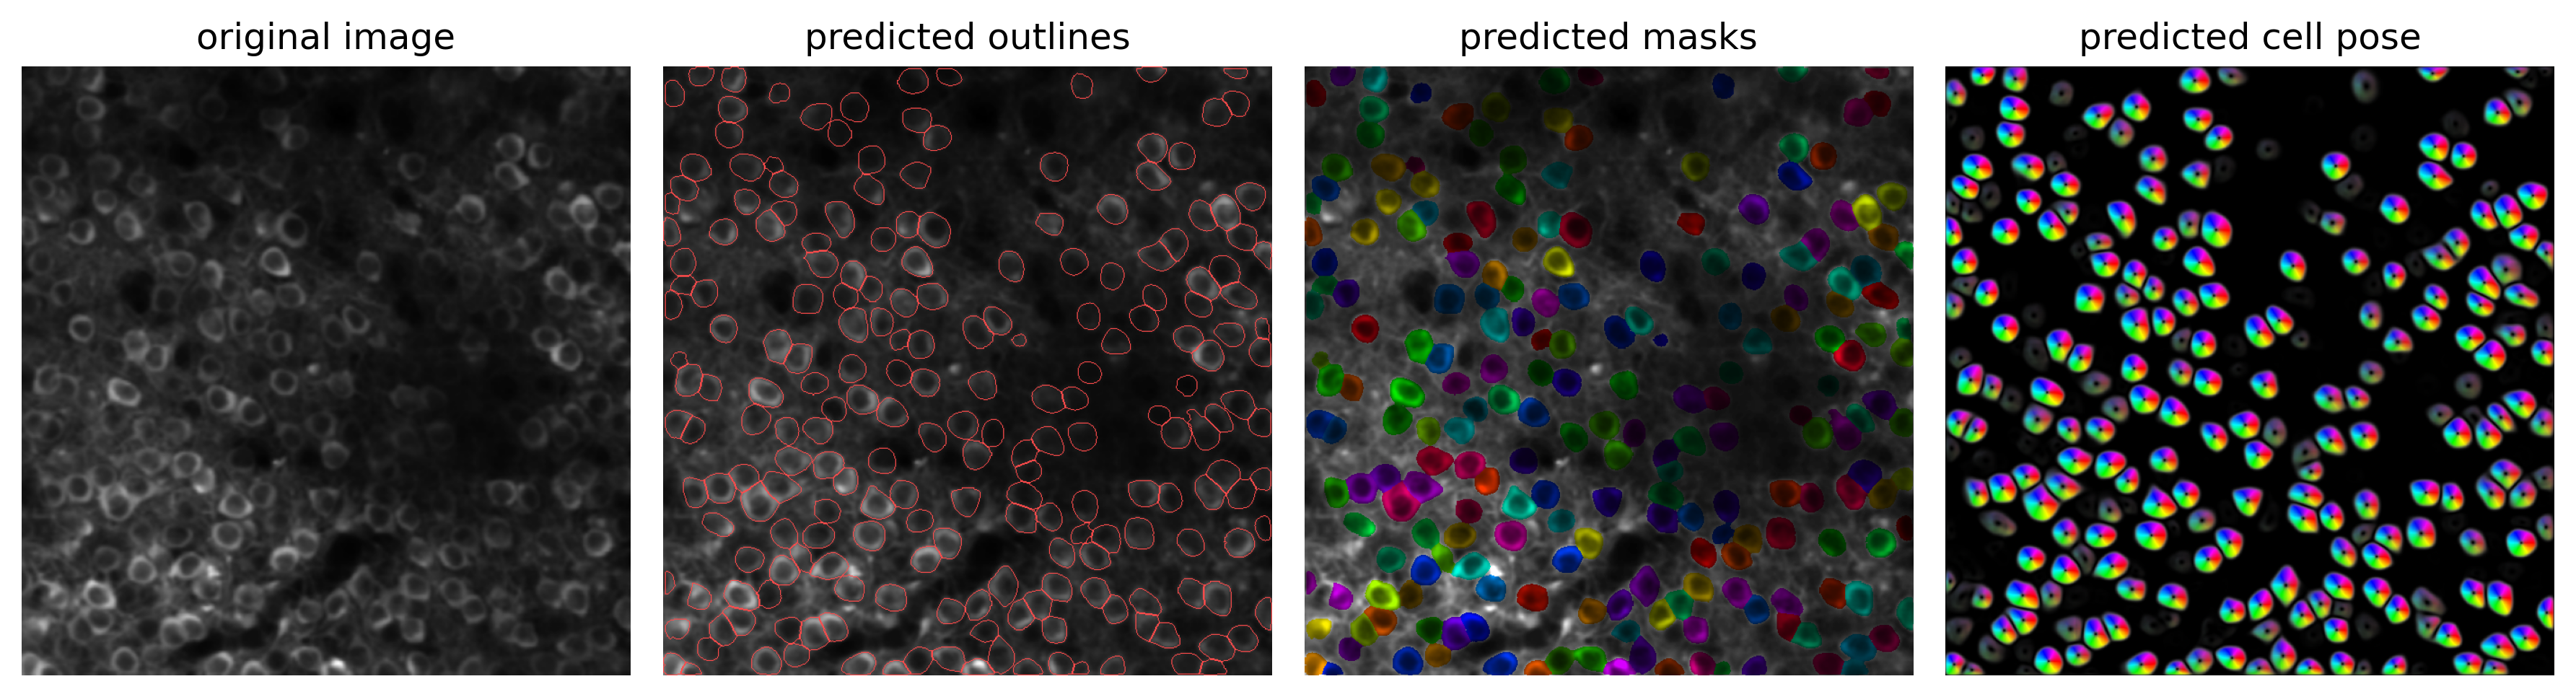

In [4]:
# DISPLAY RESULTS
from cellpose import plot

fig = plt.figure(figsize=(12,5))
plot.show_segmentation(fig, img, masks, flows[0], channels=chan)
plt.tight_layout()
plt.show()

In [6]:
img.shape

(677, 677, 3)

# Explore .npy file

In [5]:
image_file = os.path.join(data_path, "img05_seg.npy")

In [6]:
seg = np.load(image_file, allow_pickle=True).item()

In [7]:
seg.keys()

dict_keys(['outlines', 'masks', 'chan_choose', 'ismanual', 'filename', 'flows', 'est_diam'])

## Explore masks

In [8]:
seg['masks']

array([[  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       ...,
       [  0,   0, 204, ...,   0,   0,   0],
       [  0,   0, 204, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0]], dtype=uint16)

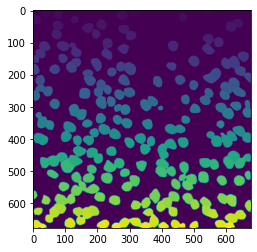

In [13]:
plt.imshow(seg['masks'])

## Explore flows

In [14]:
flows = seg['flows']
for i in range(len(flows)):
    print(flows[i].shape)

(1, 677, 677, 3)
(1, 677, 677)
(1, 664, 664, 3)
(2, 664, 664)
(3, 664, 664)


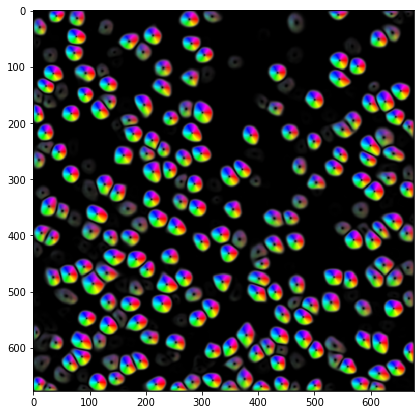

In [15]:
entry = flows[0]

fig, axs = plt.subplots(1, len(entry), figsize=(7,7))

for idx, elem in enumerate(entry):
    axs.imshow(elem)
    
plt.show()

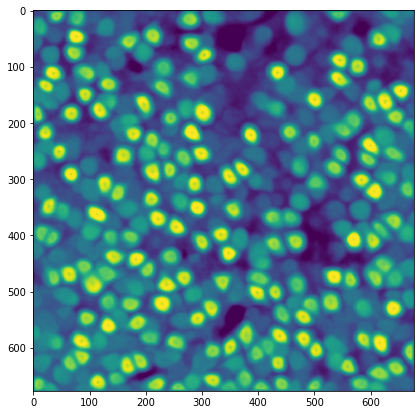

In [16]:
entry = flows[1]

fig, axs = plt.subplots(1, len(entry), figsize=(7,7))

for idx, elem in enumerate(entry):
    axs.imshow(elem)
    
plt.show()

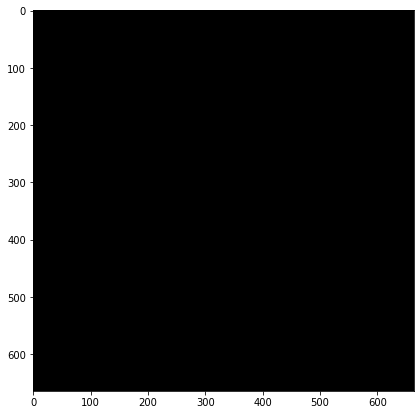

In [17]:
entry = flows[2]

fig, axs = plt.subplots(1, len(entry), figsize=(7,7))

for idx, elem in enumerate(entry):
    axs.imshow(elem)
    
plt.show()

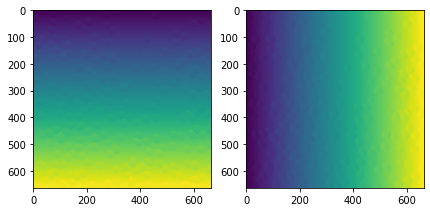

In [18]:
entry = flows[3]

fig, axs = plt.subplots(1, len(entry), figsize=(7,7))

for idx, elem in enumerate(entry):
    axs[idx].imshow(elem)
    
plt.show()

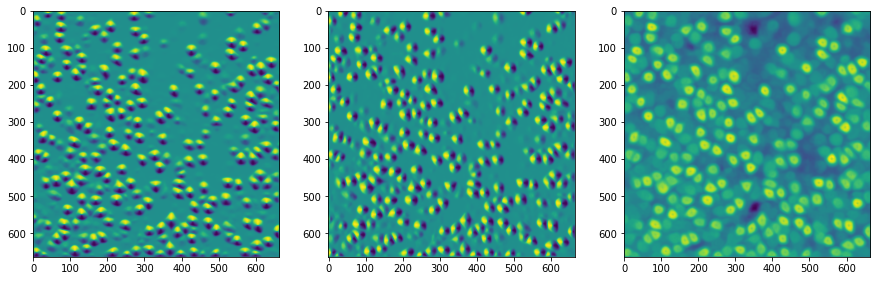

In [19]:
entry = flows[4]

fig, axs = plt.subplots(1, len(entry), figsize=(15,5))

for idx, elem in enumerate(entry):
    axs[idx].imshow(elem)
    
plt.show()